In [19]:
# Breanna Powell and Melody Behdarvandian
# CSS 576
# Assignment 3

# IDE: Visual Studio Code 
# Follow these steps if you have not used Jupyter Notebooks in VS Code before:
# https://code.visualstudio.com/docs/languages/python

# -------------------------------------------------------------------------------------------------
#                    FOLLOW THESE STEPS TO INSTALL TENSORFLOW in VS CODE
# -------------------------------------------------------------------------------------------------
# Open Anaconda Navigator 
# Launch VS Code through Anaconda Navigator
# Terminal > New Terminal
#
# https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
# 1) Use the commands to create a tensorflow environment:
#    $ conda create -n tf tensorflow
#    $ conda activate tf
#
# https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_create-or-open-a-jupyter-notebook
# 2) In the upper right hand corner, switch the kernel from "base" over to "tf(Python 3.10.9)"
# This will change the kernel over to tensorflow's kernel.
#
# 3) Close this document and reopen it from Anaconda Navigator, but instead of "base" select "tf" from the dropdown menu
# If you don't see "tf" in the dropdown menu, try closing Anaconda Navigator and reopening it.
#
# 4) Install the following:
#    $ conda install ipykernel
#    $ conda install pandas matplotlib scikit-learn seaborn
#    $ conda install -c conda-forge tensorflow keras
# -------------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd

emailData = pd.read_csv('emails.csv')

## DATA EXPLORATION

In [20]:
emailData.shape # Check the size of the dataset

(5572, 5)

In [21]:
# Check to see if there are missing values (NaN or null)
emailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
emailData.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# PRE-PROCESSING TECHNIQUES

In [23]:
# Replace labels with 0 for ham and 1 for spam
emailData["label"] = (emailData["label"] == "spam").astype(int)

# Check to make sure it worked
emailData.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
# Separate the features (x) from the labels (y)
x = emailData['email']
y = emailData["label"]

In [25]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # LOOK FOR OTHER PARAMETERS TO USE
features = cv.fit_transform(x)
features.get_shape()

(5572, 8673)

In [26]:
# Imputing missing values with the most frequent value
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
from sklearn.impute import SimpleImputer
imputedEmails = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputedEmails.fit_transform(features)
imputedEmails.transform(features)

<5572x8673 sparse matrix of type '<class 'numpy.int64'>'
	with 73917 stored elements in Compressed Sparse Column format>

In [27]:
# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead

In [28]:
# Checking to make sure that there are no NaN's after using the imputer
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

# Feature Reduction

# Split into Train and Test

In [29]:
# Split into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [30]:
x_train.shape

(4457, 8673)

In [31]:
len(x_train)

4457

In [32]:
len(y_train)

4457

# Neural Network

In [33]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 1 # - spam or ham
train_shape = x_train.shape
filter_size = 32 # Should be a power of 2

b = train_shape[1]
input_shape = (b,)

print(input_shape)

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# https://keras.io/api/models/sequential/


# Activation function options:
# - relu
# - sigmoid - good for last layer of binary classification
# - elu - need to research this one

model = Sequential()
model.add(Dense(8, input_shape= input_shape, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Always use a sigmoid function for final layer when performing binary classification.

In [ ]:
# https://keras.io/api/callbacks/early_stopping/
# https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
# Monitor options:
#  - loss
#  - accuracy
#  - val_loss
#  - val_binary_crossentropy
#  - precision_metric
# Mode options:
#  - min


callback = keras.callbacks.EarlyStopping(monitor='precision_metric', patience=3) # stops if the accuracy gets high
# callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3) # monitors loss if the performance goes down

In [ ]:
model.summary() #This tells us what was in this network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 69392     
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 69,433
Trainable params: 69,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
epochs = 50

In [ ]:
# https://keras.io/api/metrics/classification_metrics/#precision-class
# Optimizer options:
# - sgd (stochastic gradient descent)
# - adam?
# - rmsprop?

# https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses  <---------- TO DO: LOOK THROUGH THESE
# Loss parameter options: 
# - binary_crossentropy # https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# - mse 

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# metrics can be a list, like this: metrics=["mae", "acc"]
# Metrics parameter options:
# - accuracy
# - precision https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# - recall

# TO DO: decide if we should use any optimizers (rmsprop, adam, sgd, adagrad, adadelta)
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop


model.compile(optimizer='sgd',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC(from_logits=True)])
model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback])

Epoch 1/50


c:\Users\brely\anaconda3\envs\tf\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


140/140 [==============================] - 23s 126ms/step - loss: 0.4984 - auc: 0.5707
Epoch 2/50
140/140 [==============================] - 18s 126ms/step - loss: 0.3379 - auc: 0.9247
Epoch 3/50
140/140 [==============================] - 15s 106ms/step - loss: 0.2743 - auc: 0.9651
Epoch 4/50
140/140 [==============================] - 15s 108ms/step - loss: 0.2381 - auc: 0.9755
Epoch 5/50
140/140 [==============================] - 16s 118ms/step - loss: 0.2139 - auc: 0.9805
Epoch 6/50
140/140 [==============================] - 15s 107ms/step - loss: 0.1965 - auc: 0.9827
Epoch 7/50
140/140 [==============================] - 13s 96ms/step - loss: 0.1828 - auc: 0.9855
Epoch 8/50
140/140 [==============================] - 15s 110ms/step - loss: 0.1710 - auc: 0.9871
Epoch 9/50
140/140 [==============================] - 14s 98ms/step - loss: 0.1606 - auc: 0.9889
Epoch 10/50
140/140 [==============================] - 15s 106ms/step - loss: 0.1512 - auc: 0.9890
Epoch 11/50
140/140 [===========

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

c:\Users\brely\anaconda3\envs\tf\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Test loss: 0.04659496620297432
Test accuracy: 0.986931324005127


# Metrics

In [ ]:
from sklearn.metrics import f1_score, precision_score,recall_score

y_predict = model.predict(x_test)


# I wonder about this metric? -- it uses spam and ham in the example!
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss

35/35 [==============================] - 4s 102ms/step


# Visual

In [ ]:
# https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48

# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cf_matrix =confusion_matrix(y_test,y_predict)

# ax= plt.subplot()
# #annot=True to annotate cells
# sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# # labels, title and ticks
# ax.set_xlabel('Predicted labels');
# ax.set_ylabel('True labels');
# ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

# Clustering Techniques

## DBSCAN

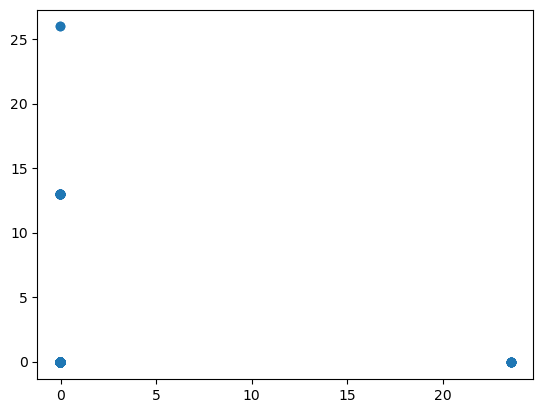

In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
#------------------------------DBSCAN ------------------------------------
x = StandardScaler().fit_transform(x)

plt.scatter(x[:, 0], x[:, 1])
plt.show()



In [36]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

neigh = NearestNeighbors(n_neighbors=2) # Computes the distances to all neighbors to help find the ideal eps value
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

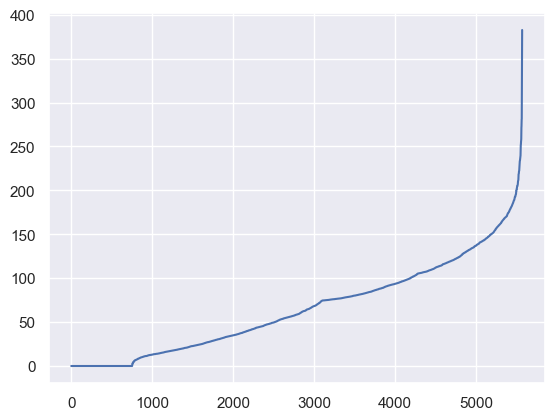

In [37]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("epsilon values")
plt.plot(distances)

# The ideal value for epsilon will be near the elbow of this graph
# I will choose to search for values between 100 and 200 to find a good epsilon in the next code section

In [40]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
def find_ideal_eps_and_samples_for_2_clusters():
    eps = [100, 125, 150, 200]
    min_samples = [3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]
    for i in eps:
        for j in min_samples:
            db = DBSCAN(eps=i, min_samples=j).fit(x)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters_ == 2:
                print("The ideal eps is: %d" % i)
                print("The ideal min_samples is: %d" % j)
                return db

# Print out the ideal value for eps and for min_samples parameters:
db = find_ideal_eps_and_samples_for_2_clusters()

The ideal eps is: 100
The ideal min_samples is: 5


In [42]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1636


In [43]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels):.3f}")

Homogeneity: 0.129
Completeness: 0.083
V-measure: 0.101
Adjusted Rand Index: 0.183
Adjusted Mutual Information: 0.100
Silhouette Coefficient: 0.155


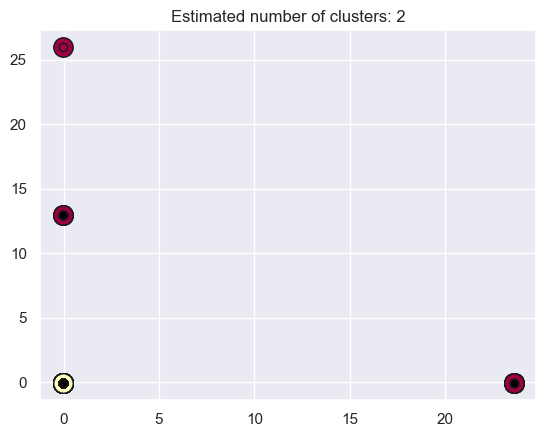

In [45]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.ylabel("")
plt.show()